#### Importing The Images

In [1]:
import os

In [2]:
#to download the dataset:
#https://drive.google.com/file/d/1N1gcN8_5dZVlIejoC00QZLSZFhGoSoQb/view

In [3]:
data_dir = '/The/path/to/your/dataset'

In [4]:
os.listdir(data_dir)

['test', 'train']

#### Exploring The Data

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [36]:
from matplotlib.image import imread

In [37]:
test_path = data_dir+'/test'
train_path = data_dir+'/train'

In [38]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [39]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [40]:
os.listdir(train_path+'/parasitized')[0]

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [41]:
para_cell = train_path+'/parasitized'+'/C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [42]:
para_cell

'/Users/arthurkogan/Desktop/cell_images/train/parasitized/C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [43]:
imread(para_cell).shape

(121, 118, 3)

In [44]:
para_img = imread(para_cell)

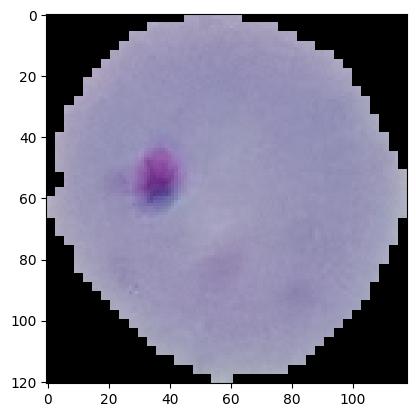

In [45]:
plt.imshow(para_img)

In [46]:
os.listdir(train_path+'/uninfected')[1]

'C205ThinF_IMG_20151106_152003_cell_21.png'

In [47]:
uninfected_cell = train_path+'/uninfected'+'/C205ThinF_IMG_20151106_152003_cell_21.png'

In [48]:
uninfected_img = imread(uninfected_cell)

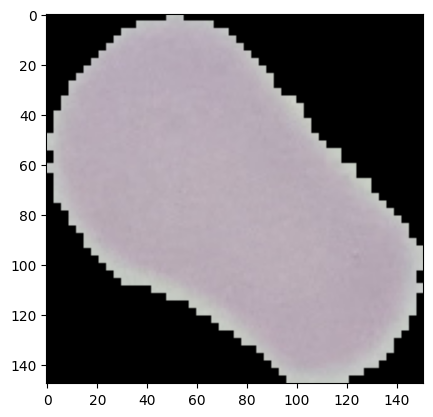

In [49]:
plt.imshow(uninfected_img)

In [50]:
len(os.listdir(train_path+'/parasitized'))

12480

In [51]:
len(os.listdir(train_path+'/uninfected'))

12480

In [52]:
len(os.listdir(test_path+'/parasitized'))

1300

In [53]:
len(os.listdir(test_path+'/uninfected'))

1300

In [54]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'/uninfected'):
    img = imread(test_path+'/uninfected/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [55]:
for i in range(10):
    print(dim1[i], dim2[i], sep=(' X '))

127 X 127
109 X 121
127 X 151
118 X 130
127 X 124
118 X 127
133 X 136
115 X 124
133 X 124
142 X 130


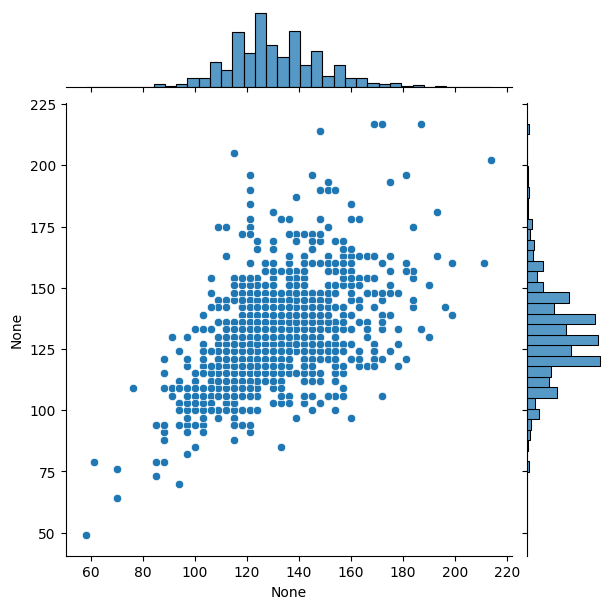

In [56]:
sns.jointplot(x=dim1,y=dim2)

In [57]:
np.mean(dim1)

130.92538461538462

In [58]:
np.mean(dim2)

130.75

In [59]:
image_shape = (130,130,3)

#### Preprocessing The Data

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
#help(ImageDataGenerator)

In [62]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1,
                               zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')

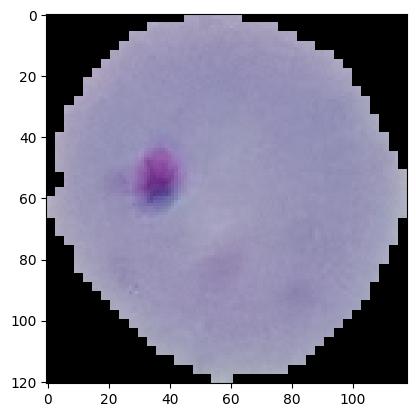

In [63]:
plt.imshow(imread(para_cell))

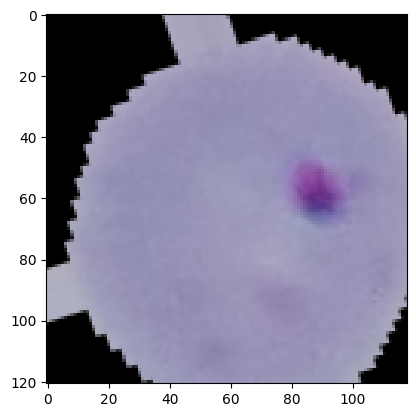

In [64]:
plt.imshow(image_gen.random_transform(para_img))

In [65]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [66]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


#### Building The Model

In [67]:
from tensorflow.keras.models import Sequential

In [68]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [69]:
#ordering or sequencing of layers within a model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128, activation='relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1, activation ='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [70]:
from tensorflow.keras.callbacks import EarlyStopping

In [71]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [72]:
batch_size = 16

In [73]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb',
                                               batch_size=batch_size, class_mode='binary')

Found 24958 images belonging to 2 classes.


In [74]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb',
                                               batch_size=batch_size, class_mode='binary', shuffle=False)

Found 2600 images belonging to 2 classes.


In [75]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [76]:
results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/20


/var/folders/9p/b0gdpjfx0bs9gnwgkcv4t_p80000gn/T/ipykernel_2601/3669551767.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])


1560/1560 [==============================] - 128s 82ms/step - loss: 0.8556 - accuracy: 0.5534 - val_loss: 0.6947 - val_accuracy: 0.5238
Epoch 2/20
1560/1560 [==============================] - 130s 83ms/step - loss: 0.6820 - accuracy: 0.5752 - val_loss: 0.6770 - val_accuracy: 0.5965
Epoch 3/20
1560/1560 [==============================] - 132s 85ms/step - loss: 0.6698 - accuracy: 0.5952 - val_loss: 0.6718 - val_accuracy: 0.5862
Epoch 4/20
1560/1560 [==============================] - 132s 85ms/step - loss: 0.6123 - accuracy: 0.6513 - val_loss: 0.2603 - val_accuracy: 0.9227
Epoch 5/20
1560/1560 [==============================] - 136s 87ms/step - loss: 0.2125 - accuracy: 0.9351 - val_loss: 0.1954 - val_accuracy: 0.9381
Epoch 6/20
1560/1560 [==============================] - 141s 91ms/step - loss: 0.1914 - accuracy: 0.9437 - val_loss: 0.1821 - val_accuracy: 0.9485
Epoch 7/20
1560/1560 [==============================] - 138s 88ms/step - loss: 0.1837 - accuracy: 0.9448 - val_loss: 0.1697 - val

#### Evaluating The Model

In [77]:
losses = pd.DataFrame(model.history.history)

<Axes: >

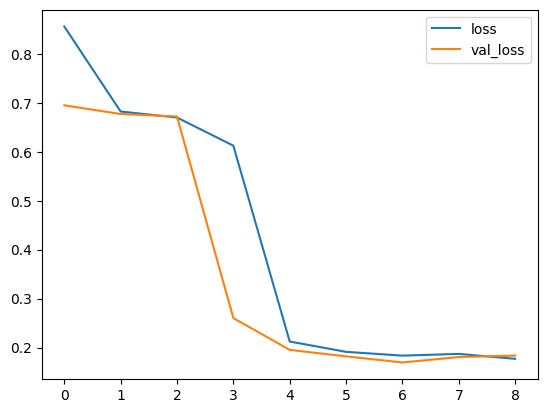

In [78]:
losses[['loss','val_loss']].plot()

In [79]:
model.metrics_names

['loss', 'accuracy']

In [80]:
model.evaluate(test_image_gen)

163/163 [==============================] - 6s 38ms/step - loss: 0.1861 - accuracy: 0.9442


[0.18608632683753967, 0.9442307949066162]

In [81]:
from tensorflow.keras.preprocessing import image

In [82]:
pred_probabilities = model.predict(test_image_gen)

163/163 [==============================] - 6s 37ms/step


In [83]:
pred_probabilities

array([[2.1881666e-02],
       [3.4335564e-04],
       [2.5673535e-02],
       ...,
       [9.3974078e-01],
       [9.6524775e-01],
       [9.7014916e-01]], dtype=float32)

In [84]:
predictions = pred_probabilities > 0.5

In [85]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [93]:
from sklearn.metrics import classification_report,confusion_matrix

In [94]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1300
           1       0.91      0.97      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [95]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1182,  118],
       [  34, 1266]])

#### Predicting On An Image

In [96]:
para_cell

'/Users/arthurkogan/Desktop/cell_images/train/parasitized/C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [97]:
my_image = image.load_img(para_cell,target_size=image_shape)

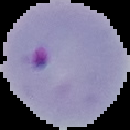

In [98]:
my_image

In [99]:
type(my_image)

PIL.Image.Image

In [100]:
my_image = image.img_to_array(my_image)

In [101]:
type(my_image)

numpy.ndarray

In [102]:
my_image.shape

(130, 130, 3)

In [103]:
my_image = np.expand_dims(my_image, axis=0)

In [104]:
my_image.shape

(1, 130, 130, 3)

In [105]:
if (model.predict(my_image)) < 0.5:
    print('parasitized')
else:
    print('uninfected')

1/1 [==============================] - 0s 44ms/step
parasitized


In [106]:
my_image = image.load_img(uninfected_cell,target_size=image_shape)

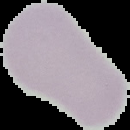

In [107]:
my_image

In [108]:
my_image = image.img_to_array(my_image)

In [109]:
my_image = np.expand_dims(my_image, axis=0)

In [110]:
if (model.predict(my_image)) < 0.5:
    print('parasitized')
else:
    print('uninfected')

1/1 [==============================] - 0s 19ms/step
uninfected


In [111]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [112]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}